# Explore this dataset :

In [18]:
import pandas as pd
df = pd.read_csv("C:/file/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
df.shape

(21613, 21)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [21]:
#find the missing info in total
print(df.isnull().sum())
print(df.isnull().sum().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
0


=>there are no missing values ,which helps us creating better model.

-The most important features in our dataset are those that have the greatest impact on the target variable or the greatest predictive power

In [39]:
#drop the less important features:
new_df=df.drop(["id","date"] , axis=1)
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#  the most important features :

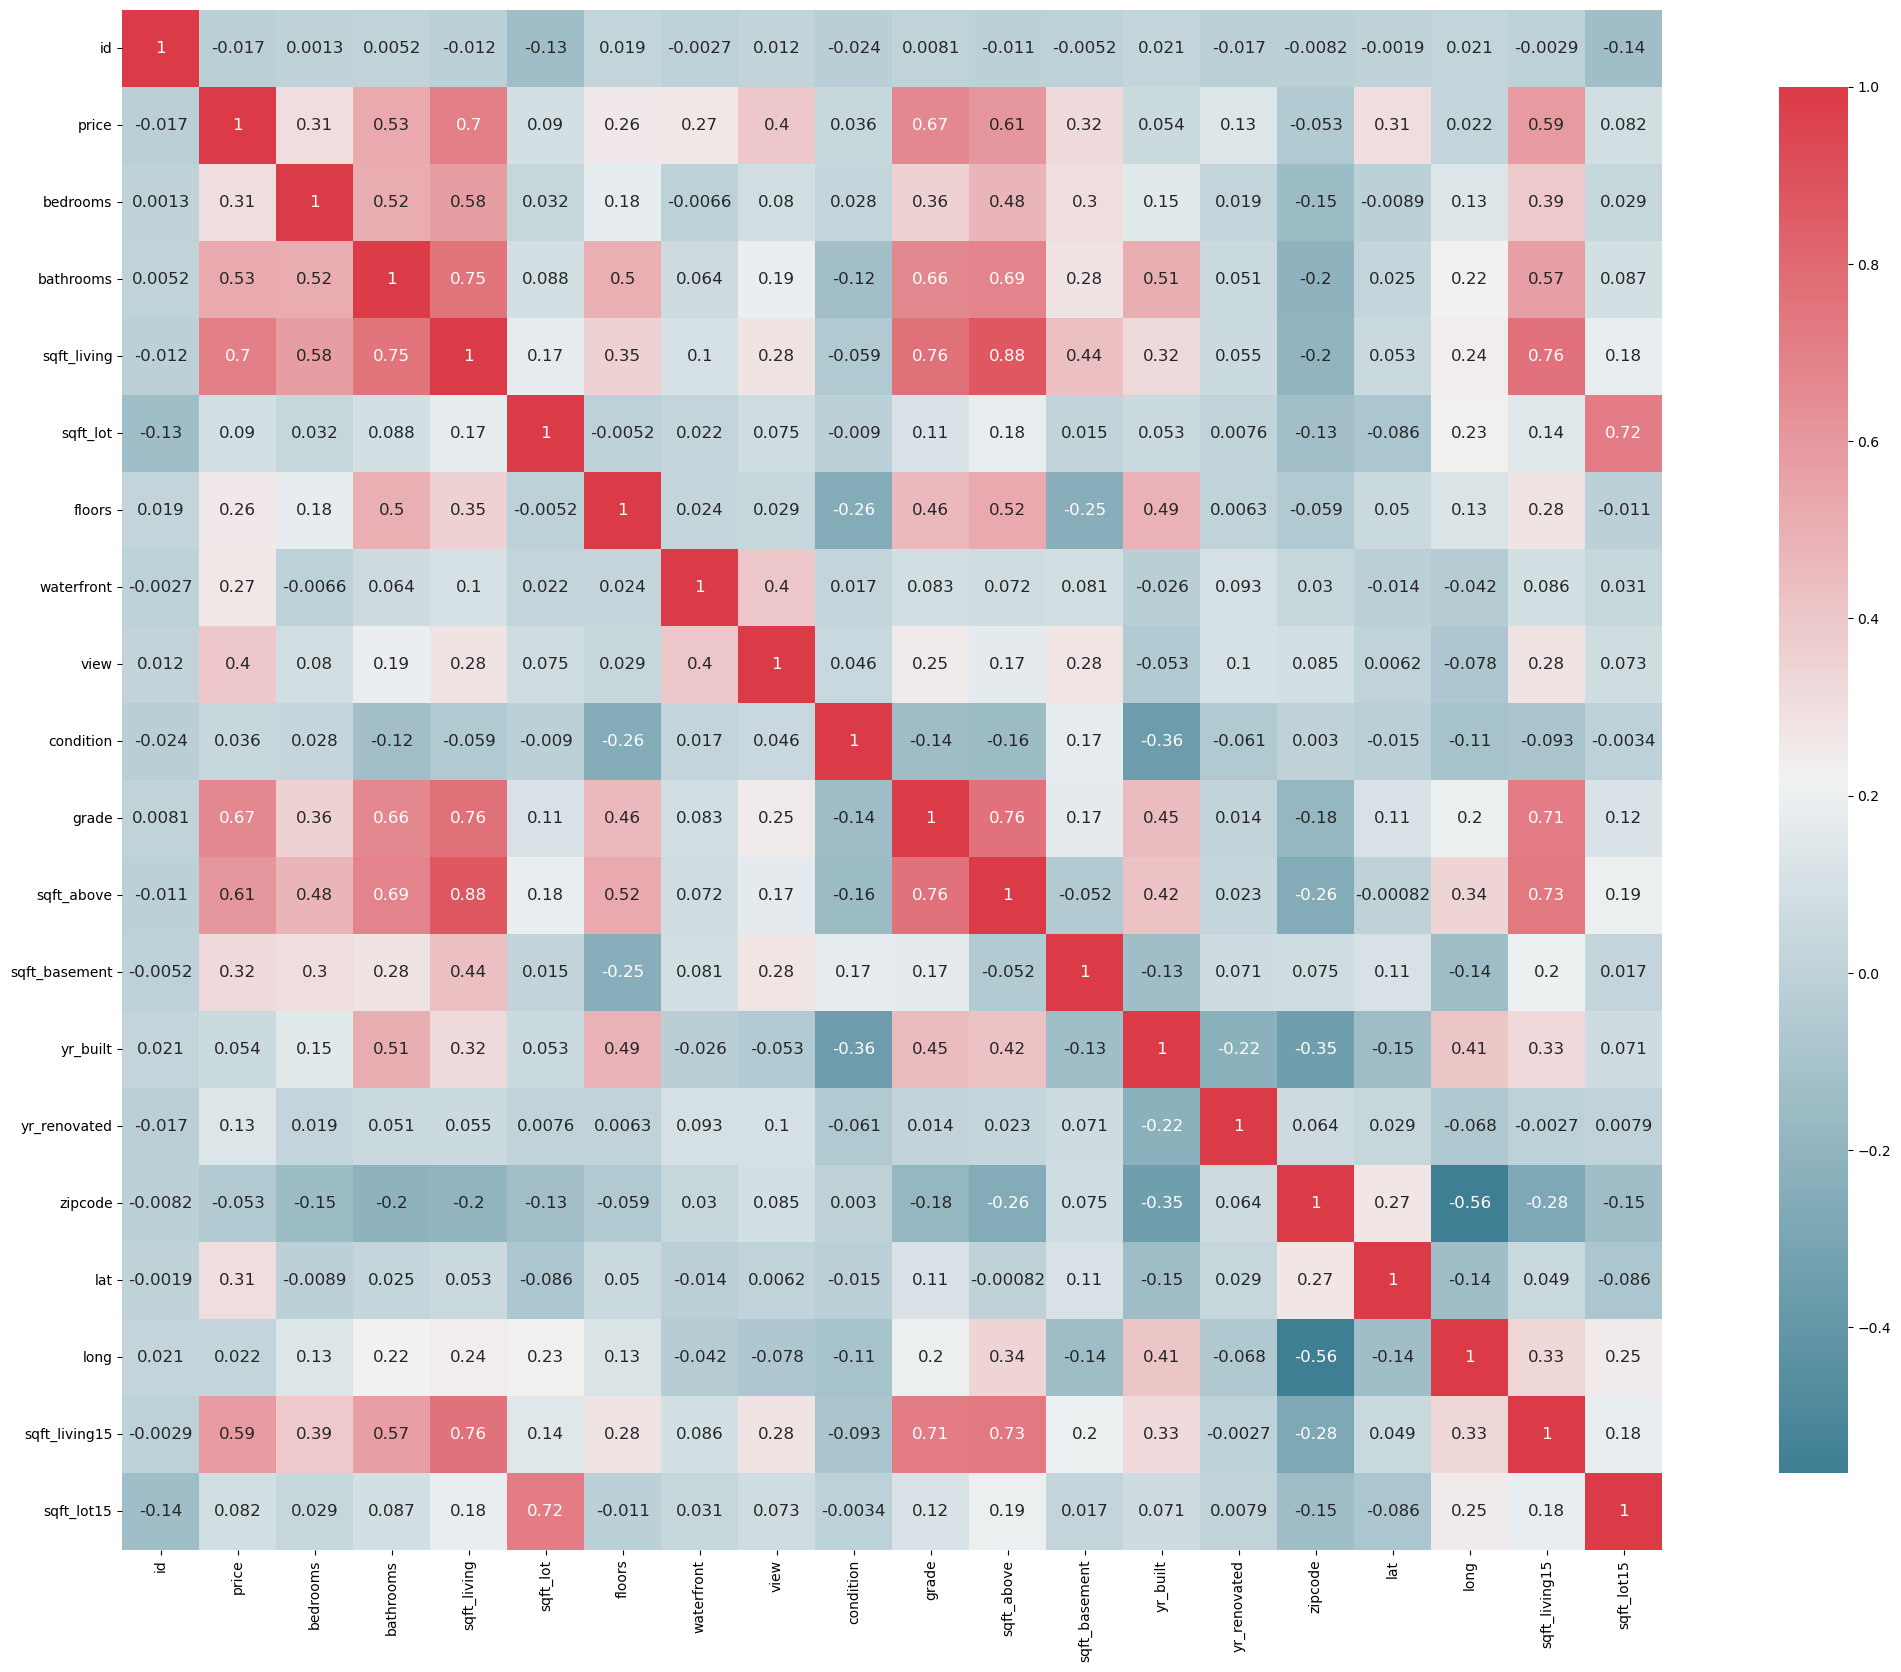

In [23]:
#using the heatmap method:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 30 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
        
    )

plot_correlation_map(df)


According to the heatmap the most important features are the ones who are correlated with the price variable such as 'sqft_living' ,'bathrooms','grade','view','lat',waterfront'... 

# Split your dataset into a training set and a testing set:

In [41]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [15]:
#importing libraries;
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
df = pd.read_csv("C:/file/kc_house_data.csv")

In [36]:
#defining x and y;
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=20)  #splitting data into train set and test set
model=LinearRegression()
#fitting the training set
model.fit(x_train,y_train)
#testing the model s performance
predicted=model.predict(x_test)

TypeError: 'numpy.ndarray' object is not callable

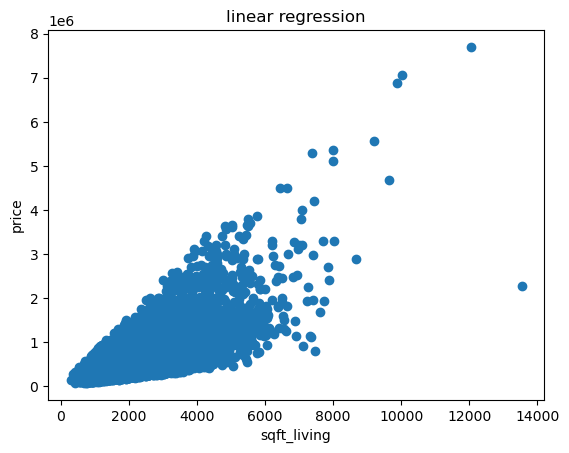

In [18]:
#plot the linear regressin
plt.scatter(x,y)
plt.title("linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model,predicted(x))
plot.show()

In [37]:
#Measure the performance of linear regression using the testing set:
print("MSE", mean_squared_error(y_test,predicted))
print("Rsquared1", metrics.r2_score(y_test,predicted))


MSE 67654127088.435265
Rsquared1 0.4942622326969226


In [34]:
#Apply multiple-linear regression and compare it to the linear model. 
x=df[["sqft_living","grade","bathrooms","bedrooms","floors","view","waterfront","sqft_basement","zipcode","lat"]].values
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=20)  #splitting data into train set and test set
model=LinearRegression()
#fitting the training set
model.fit(x_train,y_train)
#testing the model s performance
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("Rsquared2", metrics.r2_score(y_test,predicted))

MSE 46549212774.9222
Rsquared2 0.652028694306674


after applying the multiple linear regression we can deduce that the Rsquared2>Rsquared1 therefore the model s performance has improved  

In [33]:
#Apply polynomial regression and compare it to linear and multilinear regression.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

x= df[["view", "grade","waterfront","long","condition","lat","sqft_living","sqft_above","zipcode","yr_built"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("Rsquared: ", metrics.r2_score(y_test,predicted))


MSE:  23202626635.223217
Rsquared:  0.8154384156524378


the Rsquared has remarquably increased after applying the polynomial regression so that the our model's performance
has improved much more better than while using the Linear regression and the multiple linear regression . 
our model now can be taken as a nearly perfect one